In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def calculate_statistics(values):
    mean = np.mean(values)
    variance = np.var(values)
    median = np.median(values)
    return mean, variance, median

In [13]:
folders = ['../Fog_Simulator-FoHIS/Results/With_MiDaS/',
           '../Fog_Simulator-FoHIS/Results/With_Depth-Anything/',
           '../Fog_Simulator-FoHIS/Results/With_Depth_Maps/']

In [14]:
data_dict = {folder: {'values': []} for folder in folders}

In [15]:
def plot_graph(folder, title):
    plt.figure(figsize=(8, 6))
    plt.plot(data_dict[folder]['values'], label='Values')

    mean, variance, median = calculate_statistics(data_dict[folder]['values'])

    plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axhline(y=variance, color='g', linestyle='--', label=f'Variance: {variance:.2f}')
    plt.axhline(y=median, color='b', linestyle='--', label=f'Median: {median:.2f}')

    plt.title(title)
    plt.xlabel('Image Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
with open('results.txt', 'r') as file:
    lines = file.readlines()

In [17]:
for line in lines:
    image_path, values_str = line.strip().split(': ')
    for folder in folders:
        if folder in image_path:
            values = [float(val.strip('[]')) for val in values_str.split(', ')]
            data_dict[folder]['values'].extend(values)
            break

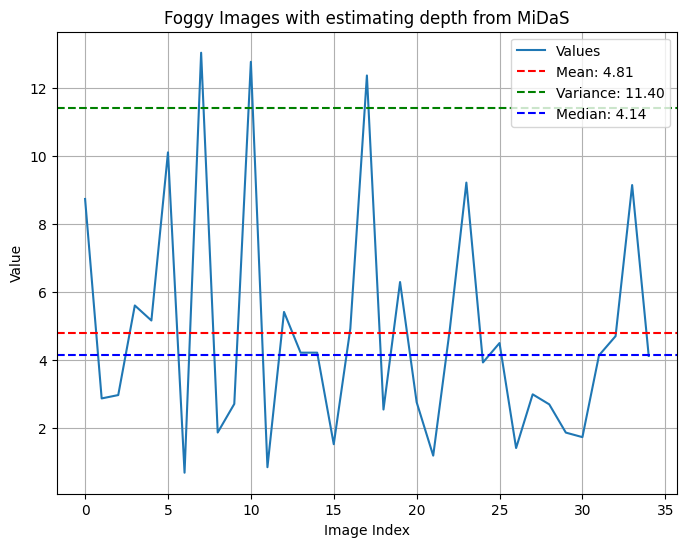

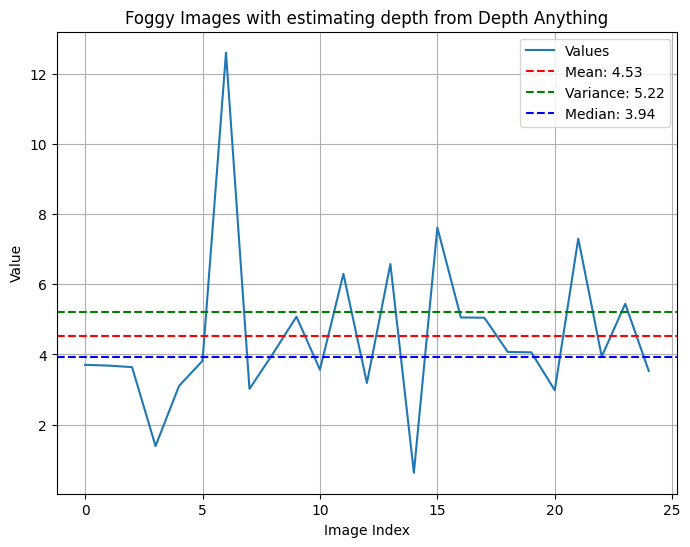

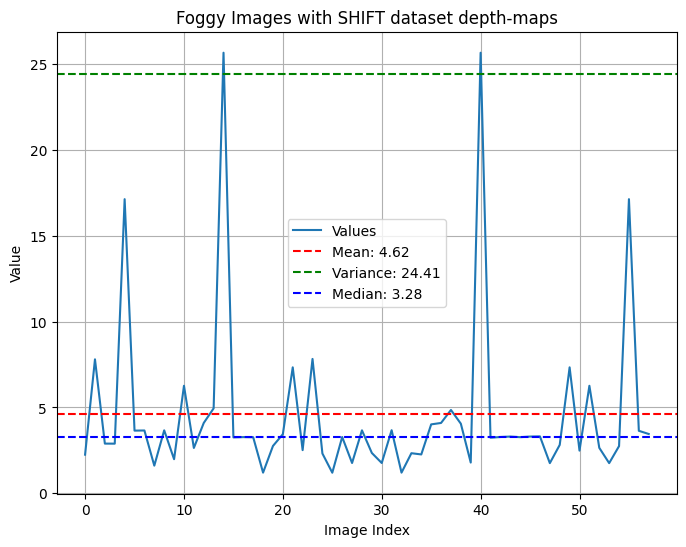

In [18]:
for folder in data_dict:
    title = input(f"Enter title for '{folder}' graph: ")
    plot_graph(folder, title)
